## (Geometric) Brownian noise model

Let's model the price of stocks using a Brownian noise model. That is, we assume a data 
generating process of the form:
$$ P_{t+1} = P_t(1 + dP_t),$$
where $P_t$ represents the price at time $t$ and $ dP_t \sim \mathcal{N}(\mu, \sigma)$ is a Gaussian-distributed random variable. Note that since the jump size is proportional to the current price, the drift in this model has an exponential effect; for $\sigma = 0$, we have $P_t \propto \exp(\mu t)$, as opposed to the usual case of Brownian noise with a linear drift.

Our goal is to estimate the parameters $\mu$ and $\sigma$. We do so by maximum likelihood, ignoring the effects of priors. In this case, the sample mean and variance for the series
$$ p_t \equiv \frac{P_{t+1} - P_t}{P_t} $$
gives us our desired estimates.

In [4]:
import pandas as pd
import numpy as np
import matplotlib as mpl
%matplotlib inline
mpl.rcParams['figure.figsize'] = (12, 8)
from matplotlib import pyplot as plt

In [9]:
stocks = pd.read_csv('data/SPY_TIME_SERIES_DAILY.csv').sort_values('timestamp', ascending=True).set_index('timestamp')
stocks.head()

,open,high,low,close,volume
timestamp,,,,,
1995-01-03,45.7031,45.8437,45.6875,45.7812,324300
1995-01-04,45.9843,46.0000,45.7500,46.0000,351800
1995-01-05,46.0312,46.1093,45.9531,46.0000,89800
1995-01-06,46.0937,46.2500,45.9062,46.0468,448400
1995-01-09,46.0312,46.0937,46.0000,46.0937,36800


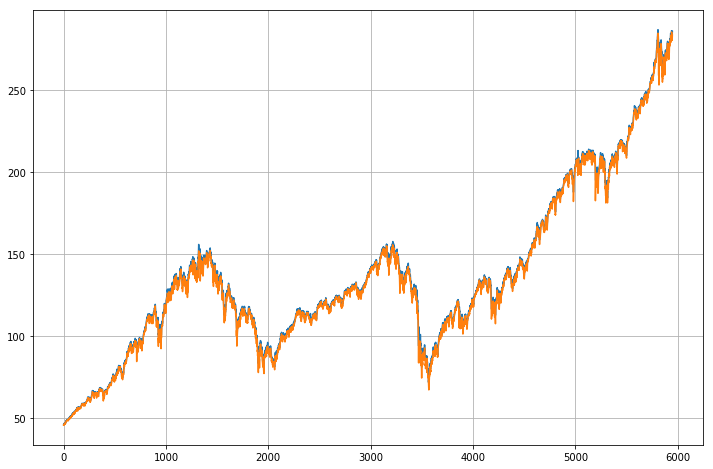

In [8]:
# always look at the data
plt.plot(stocks.high.values)
plt.plot(stocks.low.values)
plt.grid()

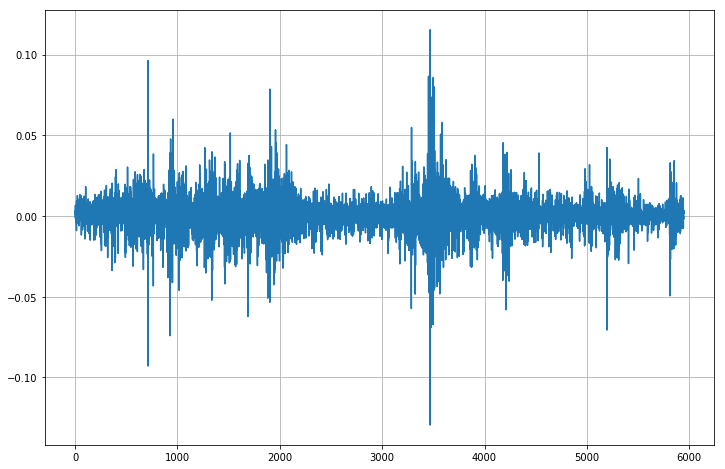

In [29]:
# compute fractional price changes
Pt = stocks.open.values
PtPlusOne = Pt[1:]
Pt = Pt[:-1]
pt = (PtPlusOne - Pt) / Pt
plt.plot(pt)
# pd.DataFrame(pt, index=stocks.index.values[:-1]).plot()
# plt.xticks(labels=stocks.iloc[map(int, plt.gca().get_xticklabels())].index.values)
plt.grid()

0.00037803502883970865 0.011910027461719335


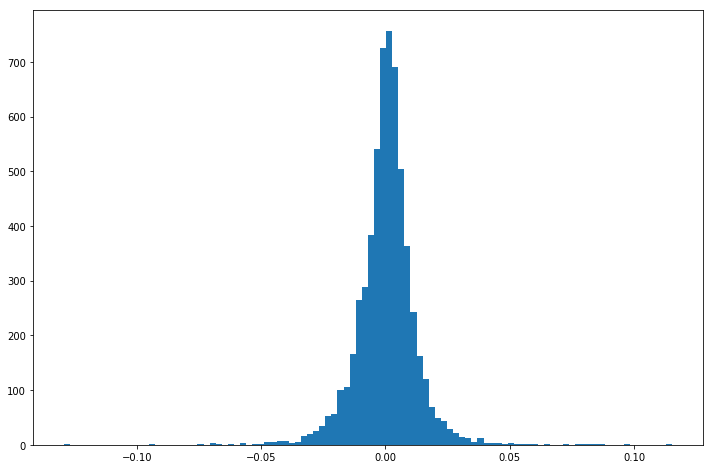

In [39]:
plt.hist(pt, bins=100)
print(pt.mean(), pt.std())

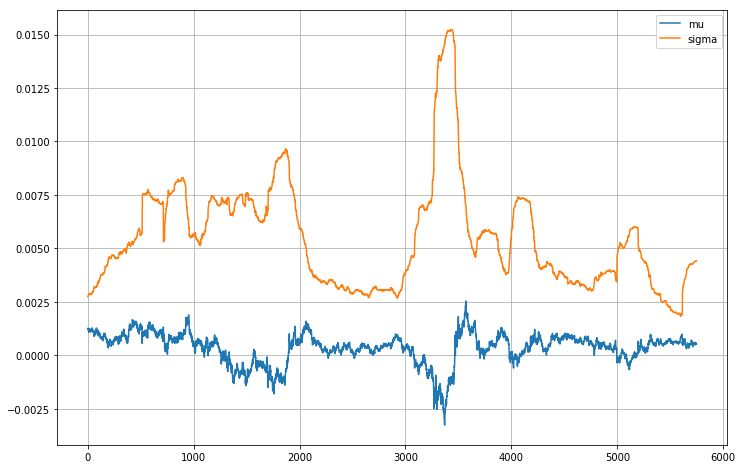

In [41]:
# take a window of samples to estimate "local" mu and sigma
# I assume these are not time independent
# since I'm using smallish samples here, would be really nice to supplement with
# error estimates TODO
window = 200
mu, sigma = [], []
for offset in range(len(pt) - window):
    mu.append(pt[offset:offset+window].mean())
    sigma.append(pt[offset:offset+window].std())
    
plt.plot(mu, label='mu')
# plt.plot([s**2 / 2 for s in sigma], label='sigma')
plt.plot([s / 2 for s in sigma], label='sigma')
plt.grid()
plt.legend()

## Higher order autoregressive models

In [19]:
sum([x * b**2 for x, b in zip(n, bins)]) / sum(n)

2.0586674677735606

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
# leave a hold out set
X = stocks.Close.values[:2000]
dt = 250
X_train = [X[j:j + dt] for j in range(len(X) - dt - 1)]
y = [X[j + dt + 1] for j in range(len(X) - dt - 1)]
print len(X_train), len(y)

1749 1749


In [13]:
clf = LinearRegression(normalize=True)
clf.fit(X_train, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

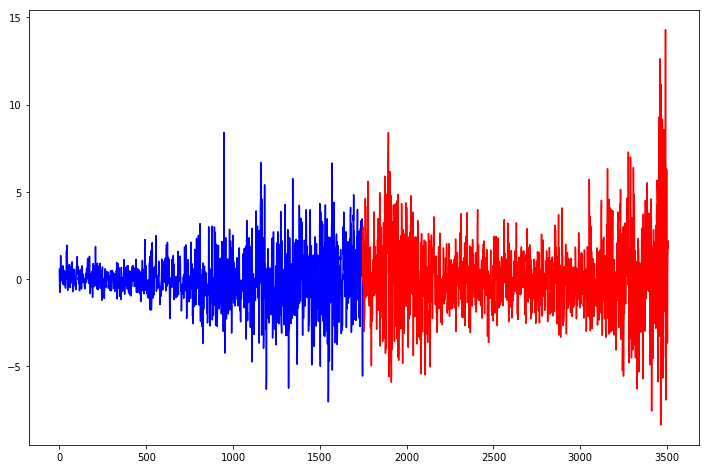

In [14]:
X = stocks.Close.values[:2000]
X_train = [X[j:j + dt] for j in range(len(X) - dt - 1)]
y = [X[j + dt + 1] for j in range(len(X) - dt - 1)]
x = range(len(X_train))
plt.plot(x, clf.predict(X_train) - y, 'b')

X = stocks.Close.values[1990:4000]
X_train = [X[j:j + dt] for j in range(len(X) - dt - 1)]
y = [X[j + dt + 1] for j in range(len(X) - dt - 1)]
x = range(max(x), max(x) + len(X_train))
plt.plot(x, clf.predict(X_train) - y, 'r')
